![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [54]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelos
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from kneed import KneeLocator # !pip install kneed
from scipy import stats

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# *2. Carga de datos*

In [55]:
# Cargar el dataset para utilizar en clustering
df = pd.read_csv("./data/dfClustering.csv", sep=';', index_col=False, low_memory=False)

# *3. Exploración de datos*

In [56]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9862 filas y 62 columnas.


In [57]:
df.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,150.00,Carabanchel,11,Vista Alegre,114,0,Piso,2,0.00,2.00,3,3,1,1,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28025,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,47727,505,36,3,16,0,0,289,15239,2.66,28825,139,57,1332,483,298,854,455,1560282,0,0,0,1,1,410000
1,95.00,Salamanca,4,Castellana,46,0,Piso,2,0.00,2.00,2,2,0,0,0,0,mas_50,0,lujo,0,0,1,0,0,0,1,28006,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,16919,189,3,6,18,0,1,186,38751,2.28,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1149000


In [58]:
df.columns

Index(['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio',
       'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios',
       'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad',
       'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior',
       'piscina', 'porton_electrico', 'videoportero', 'armarios',
       'codigo_postal', 'tipo_suelo', 'certificado_energetico',
       'puerta_seguridad', 'orientacion_este', 'orientacion_oeste',
       'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte',
       'letra_emisiones', 'num_personas', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro',
       'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
       'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar',
       'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas',
       'hosteleria_restauracion', 'salud_bienestar_educacion',
  

In [59]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
m2_constr                        0
distrito                         0
cod_distrito                     0
barrio                           0
cod_barrio                       0
letra_ce                         0
tipologia                        0
estado                           0
amueblado                        0
planta                           0
dormitorios                      0
banos                            0
balcon                           0
terraza                          0
trastero                         0
ascensor                         0
antiguedad                       0
jardin                           0
tipo_inmueble                    0
cancha_tenis                     0
chimenea                         0
exterior                         0
piscina                          0
porton_electrico                 0
videoportero                     0
armarios                         0
codigo_postal           

Se confirman las 62 columnas, que abarcan:
- Datos físicos (m2, número de habitaciones, presencia de balcón, trastero, jardín, etc.)
- Servicios del barrio (número de salidas de metro, renta bruta media, número de comercios)
- Variables energéticas y orientaciones
- Indicadores sociales y económicos
- El precio de la vivienda (target)

Este dataset combina datos estructurales del inmueble con variables de entorno y servicios del barrio, lo cual es ideal para análisis exploratorio y segmentación. Se observa que algunas variables categóricas como tipo_inmueble o antigüedad están en formato texto, lo cual debe ser tratado con técnicas de encoding más adelante.

La diversidad de variables permite múltiples enfoques:
- Clustering basado solo en características del inmueble.
- Clustering basado en entorno y accesibilidad.
- Clustering mixto (inmueble + entorno).

Una reducción de dimensionalidad con PCA o una selección de variables clave será beneficiosa para evitar el “curse of dimensionality”.

## 3.1. Tipos de datos

In [60]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      50
object      8
float64     4
Name: count, dtype: int64.


Se cuentan los tipos int64, float64, object, etc.
Este análisis ayuda a identificar:
- Variables categóricas (object) que requieren transformación con LabelEncoder o OneHotEncoder.
- Variables numéricas que se pueden escalar directamente.

El clustering requiere que todas las variables estén en formato numérico y en la misma escala. Por eso se debe separar entre variables numéricas y categóricas.

In [61]:
# Obtener lista de columnas que son de tipo object
columnas_object = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar la lista de columnas
print(columnas_object)

['distrito', 'barrio', 'tipologia', 'antiguedad', 'tipo_inmueble', 'tipo_suelo', 'aire', 'grupo_cocina']


Estas variables contienen información cualitativa que puede ser relevante para la segmentación. Por ejemplo, el tipo de inmueble o el barrio pueden influir en el precio y características de las viviendas.

In [62]:
# Columnas pendientes de hacer Label Encoding
columnas_object_df = df.select_dtypes(include=['object'])
columnas_object_df.head()

,distrito,barrio,tipologia,antiguedad,tipo_inmueble,tipo_suelo,aire,grupo_cocina
0,Carabanchel,Vista Alegre,Piso,30_50,Desconocido,Desconocido,Normal,Desconocido
1,Salamanca,Castellana,Piso,mas_50,lujo,Desconocido,Normal,Desconocido
2,Salamanca,Goya,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
3,Moncloa-Aravaca,Ciudad Universitaria,Chalet,Desconocido,lujo,Desconocido,Desconocido,Desconocido
4,Vicálvaro,El Cañaveral,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido


In [63]:
# Obtener variables que son de tipo float
columnas_float = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float.head()

,m2_constr,amueblado,planta,tamano_medio_del_hogar
0,150.00,0.00,2.00,2.66
1,95.00,0.00,2.00,2.28
2,108.00,0.00,8.00,2.28
3,767.00,0.00,0.00,2.58
4,128.00,0.00,3.00,2.69


In [64]:
# Revisar si amueblado es una variable numérica continua o es booleana/categórica
amueblado_unique = df['amueblado'].unique()
print(amueblado_unique)

[0.  1.  0.1 0.5]


La columnas 'amueblado' tendrá que ser encoded.

In [65]:
# Obtener variables que son de tipo int
columnas_int = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int.head(2)

,cod_distrito,cod_barrio,letra_ce,estado,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target
0,11,114,0,2,3,3,1,1,0,1,0,0,0,1,0,0,0,1,28025,0,0,0,0,0,0,0,47727,505,36,3,16,0,0,289,15239,28825,139,57,1332,483,298,854,455,1560282,0,0,0,1,1,410000
1,4,46,0,2,2,2,0,0,0,0,0,0,0,1,0,0,0,1,28006,0,0,0,0,0,0,0,16919,189,3,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1149000


In [66]:
# Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                    'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                    'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                    'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                    'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target']
df[columnas_a_float] = df[columnas_a_float].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final.head(2)

,cod_distrito,cod_barrio,letra_ce,estado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group
0,11,114,0,2,1,1,0,1,0,0,0,1,0,0,0,1,28025,0,0,0,0,0,0,0,0,0,0,1
1,4,46,0,2,0,0,0,0,0,0,0,1,0,0,0,1,28006,0,0,0,0,0,0,0,0,0,0,5


Se homogeniza el tipo de datos para facilitar el escalado posterior. En modelos como KMeans, mantener consistencia numérica es esencial para el cálculo de distancias.

In [67]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_2 = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_2}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      28
float64    26
object      8
Name: count, dtype: int64.


In [68]:
# Obtener variables que son de tipo float
columnas_float_final = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float_final.head(2)

,m2_constr,amueblado,planta,dormitorios,banos,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,num_garajes,target
0,150.00,0.00,2.00,3.00,3.00,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,1.00,410000.00
1,95.00,0.00,2.00,2.00,2.00,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1149000.00


In [69]:
df.shape

(9862, 62)

## 3.2. Variable *Target*

In [70]:
# Crear columna nueva con la transformación logarítmica del precio
df['target_log'] = np.log(df['target'])

df.head(2)

/opt/anaconda3/envs/Nuclio/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,target_log
0,150.00,Carabanchel,11,Vista Alegre,114,0,Piso,2,0.00,2.00,3.00,3.00,1,1,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28025,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,0,0,0,1.00,1,410000.00,12.92
1,95.00,Salamanca,4,Castellana,46,0,Piso,2,0.00,2.00,2.00,2.00,0,0,0,0,mas_50,0,lujo,0,0,1,0,0,0,1,28006,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1149000.00,13.95


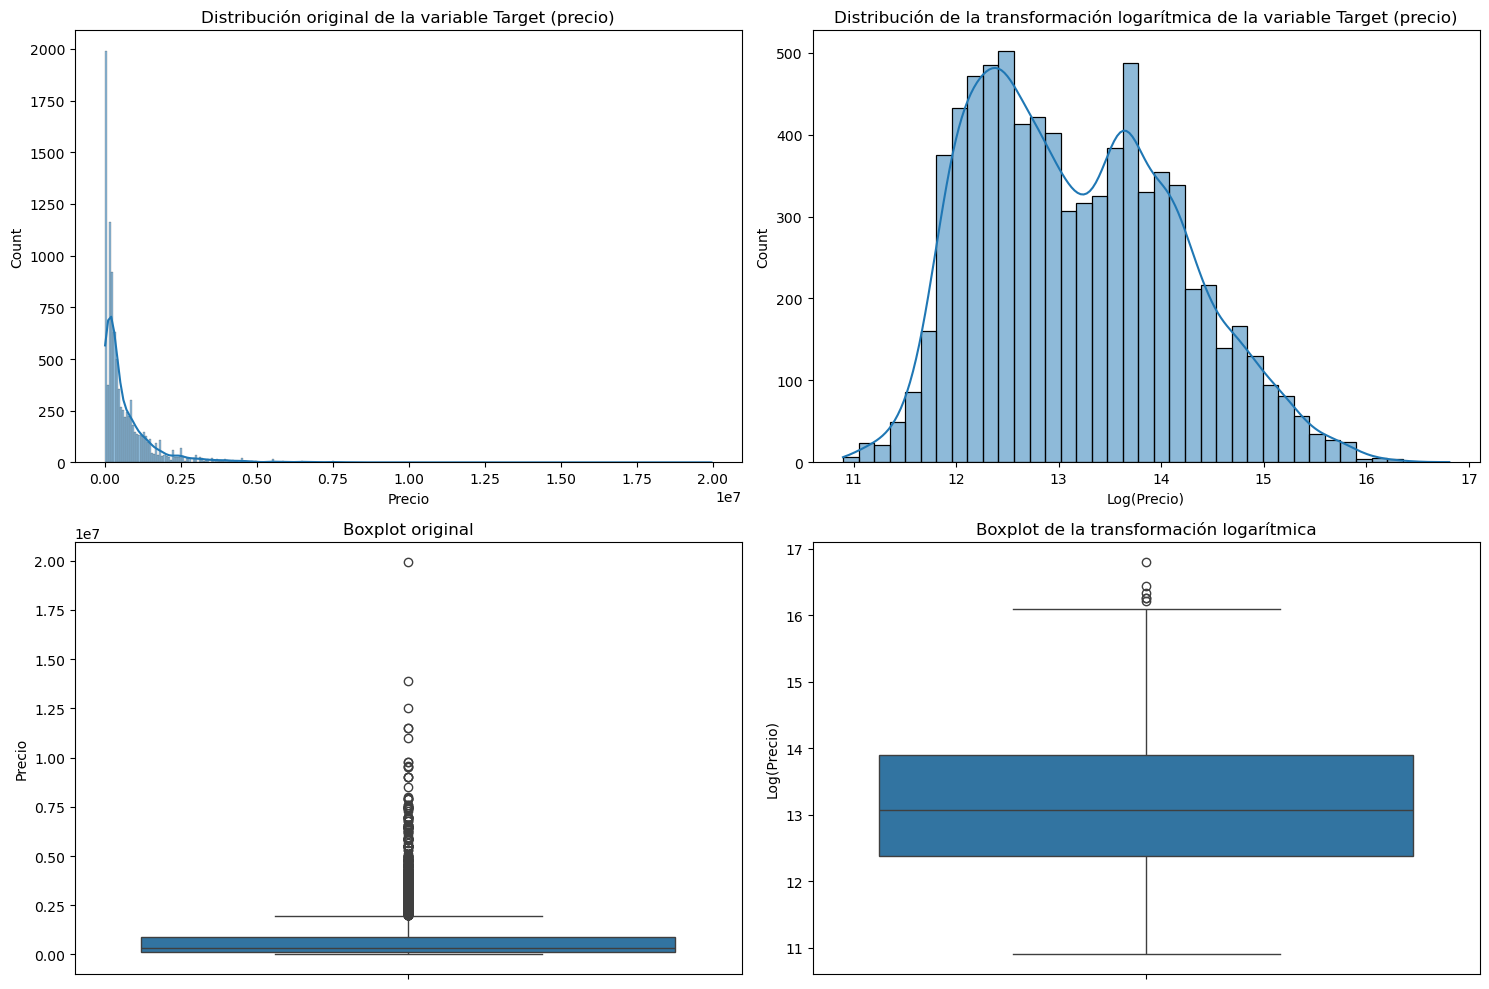


Comparación de la asimetría:

Asimetría original: 4.010
Asimetría lograda por la transformación logarítmica: nan




/opt/anaconda3/envs/Nuclio/lib/python3.12/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma original
sns.histplot(data=df, x='target', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución original de la variable Target (precio)')
axes[0,0].set_xlabel('Precio')

# Histograma de la transformación logarítmica
sns.histplot(data=df, x='target_log', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de la transformación logarítmica de la variable Target (precio)')
axes[0,1].set_xlabel('Log(Precio)')

# Boxplot original
sns.boxplot(y=df['target'], ax=axes[1,0])
axes[1,0].set_title('Boxplot original')
axes[1,0].set_ylabel('Precio')

# Boxplot de la transformación logarítmica
sns.boxplot(y=df['target_log'], ax=axes[1,1])
axes[1,1].set_title('Boxplot de la transformación logarítmica')
axes[1,1].set_ylabel('Log(Precio)')

plt.tight_layout()
plt.show()

print("\nComparación de la asimetría:\n")
print(f"Asimetría original: {df['target'].skew():.3f}")
print(f"Asimetría lograda por la transformación logarítmica: {df['target_log'].skew():.3f}\n\n")


In [72]:
print("\nEstadísticas originales de la variable 'target':")
print(df['target'].describe(),"\n")
print("\nEstadísticas de la transformación logarítmica de la variable 'target':")
print(df['target_log'].describe(),"\n")


Estadísticas originales de la variable 'target':
count       9862.00
mean      709142.95
std      1071286.37
min            0.00
25%       144000.00
50%       325000.00
75%       880000.00
max     19950000.00
Name: target, dtype: float64 


Estadísticas de la transformación logarítmica de la variable 'target':
count   9862.00
mean       -inf
std         NaN
min        -inf
25%       11.88
50%       12.69
75%       13.69
max       16.81
Name: target_log, dtype: float64 



# 4. Prerocesamiento de datos

## 4.1. *Train* y *Test*

In [73]:
# Mostrar la data para el registro documental
print("Original dataframe shape:", df.shape)
print("Original columns:", df.columns.tolist())

Original dataframe shape: (9862, 63)
Original columns: ['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios', 'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte', 'letra_emisiones', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano', 'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion', 'servicios_profesionales', 'cultura_entreten

In [74]:
# Crear una división estratificada con validación y optimización
def create_stratified_split(df, target_col='target', n_bins=5, test_size=0.2, random_state=42):
    """
    Create a stratified train-test split with proper validation and optimization.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    target_col : str
        Name of the target column
    n_bins : int
        Number of bins for target stratification
    test_size : float
        Proportion of the dataset to include in the test split
    random_state : int
        Random state for reproducibility
    
    Returns:
    --------
    train_df, test_df : tuple of pandas.DataFrame
        The split datasets
    """
    # Crear una copy
    df_copy = df.copy()
    
    # Crear bins utilizando numpy
    df_copy['target_bins'] = pd.qcut(
        df_copy[target_col], 
        q=n_bins, 
        labels=False  # Uso de False en lugar de strings para una mayor eficiencia de memoria
    )
    
    try:
        # Hacer split
        df_train, df_test = train_test_split(
            df_copy,
            test_size=test_size,
            random_state=random_state,
            shuffle=True,
            stratify=df_copy['target_bins']
        )
        
        # Eliminar la columna temporal que aloja los bins
        df_train.drop('target_bins', axis=1, inplace=True)
        df_test.drop('target_bins', axis=1, inplace=True)
        
        # Verificar el split
        verify_split(df_train, df_test, df)
        
        return df_train, df_test
    
    except Exception as e:
        print(f"Error durante el split: {str(e)}")
        return None, None

Se ha dividido el dataset en un 80% de entrenamiento y 20% de prueba, usando una estratificación sobre la variable target, discretizada en 5 bins. Esto asegura que ambos subconjuntos mantengan una distribución similar en cuanto a precios.

Al aplicar clustering es común trabajar solo con train, pero mantener un test permite validar la estabilidad del modelo de clusters o usarlo para comparar con modelos supervisados en fases posteriores. El test no se usará directamente en clustering, pero puede servir para validaciones cruzadas futuras.

In [75]:
# Verificar la integridad de la división train-test
def verify_split(train_df, test_df, original_df):
    # Validaciones rápidas
    assert train_df.shape[1] == test_df.shape[1], "Column count mismatch"
    assert set(train_df.columns) == set(test_df.columns), "Column names mismatch"
    assert len(train_df) + len(test_df) == len(original_df), "Row count mismatch"
    
    # Información del split
    print(f"\nResumen del split:")
    print(f"Shape original: {original_df.shape}")
    print(f"Shape train: {train_df.shape}")
    print(f"Shape test: {test_df.shape}")
    
    # Verificar la distribución de la variable target
    if 'target' in train_df.columns:
        print("\nDistribución del target:")
        print("Train:", train_df['target'].describe()[['mean', 'std', 'min', 'max']])
        print("Test:", test_df['target'].describe()[['mean', 'std', 'min', 'max']])

# Aplicar función
df_train, df_test = create_stratified_split(
    df,
    target_col='target',
    n_bins=5,
    test_size=0.2,
    random_state=42
)


Resumen del split:
Shape original: (9862, 63)
Shape train: (7889, 63)
Shape test: (1973, 63)

Distribución del target:
Train: mean     706191.08
std     1062567.60
min           0.00
max    19950000.00
Name: target, dtype: float64
Test: mean     720945.95
std     1105658.44
min           0.00
max    12500000.00
Name: target, dtype: float64


In [76]:
# Optimización de memoria ajustando los tipos de datos
def optimize_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            if df[col].isnull().any():
                df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            if df[col].isnull().any():
                df[col] = df[col].astype('Int32')
            else:
                df[col] = df[col].astype('int32')
    return df

# Aplicar
df_train = optimize_dtypes(df_train)
df_test = optimize_dtypes(df_test)

Se reducen los tipos de datos para mejorar el rendimiento y el uso de memoria:
- float64 → float32
- int64 → int32 o Int32 (nullable)

Esto es útil en datasets amplios, especialmente para clustering que requiere cálculos de distancia entre vectores. Mejorar el uso de memoria reduce tiempos de procesamiento, mejora la eficiencia y evita errores en entornos con recursos limitados.

In [77]:
# Verificar si uno de los dos dfs tiene columnas que el otro no tiene
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)
print("\nColumnas solo en train:", train_cols - test_cols)
print("Columas solo en test:", test_cols - train_cols)


Columnas solo en train: set()
Columas solo en test: set()


In [78]:
# Verificar que los dfs tienen las mismas columnas
print("\nLista de columnas:")
print("Training set:", df_train.columns.tolist())
print("Test set:", df_test.columns.tolist())


Lista de columnas:
Training set: ['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios', 'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte', 'letra_emisiones', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano', 'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion', 'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasve

In [79]:
df_train.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,target_log
2771,109.00,Centro,1,Sol,16,0,Piso,4,1.00,2.00,4.00,4.00,1,0,0,1,30_50,0,Desconocido,0,0,2,0,0,0,1,28013,Madera,0,0,0,0,0,Normal,Desconocido,0,0,8164.00,123.00,9.00,7.00,27.00,0.00,2.00,181.00,27030.00,1.99,34155.00,43.00,48.00,1208.00,1054.00,137.00,582.00,259.00,223280.00,0,2,6,0.00,4,979000.00,13.79
801,151.00,Fuencarral-El Pardo,8,El Pardo,81,5,Piso,2,0.00,3.00,5.00,3.00,0,0,0,1,30_50,0,Desconocido,0,0,1,1,0,0,1,28048,Desconocido,1,0,0,0,0,Desconocido,Desconocido,0,5,3421.00,24.00,0.00,3.00,14.00,2.00,5.00,448.00,28798.00,2.67,23923.00,53.00,48.00,197.00,95.00,148.00,121.00,99.00,2811379.00,0,0,0,1.00,5,725000.00,13.49


In [80]:
df_test.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,target_log
5467,65.00,Salamanca,4,Guindalera,44,3,Piso,2,0.00,1.00,2.00,1.00,0,0,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28028,Desconocido,1,0,0,0,0,Desconocido,Desconocido,0,3,41964.00,555.00,71.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,380000.00,12.85
6768,500.00,Moncloa-Aravaca,9,Valdemarín,95,4,Chalet,1,0.00,0.00,11.00,11.00,0,1,1,1,mas_50,0,Desconocido,0,0,1,2,0,0,1,28023,Desconocido,1,0,0,0,0,Desconocido,Desconocido,0,4,7156.00,61.00,10.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,0,2,0,1.00,5,2300000.00,14.65


In [81]:
# Save the verified datasets
df_train.to_csv('train_clustering_previo.csv', index=False)
df_test.to_csv('test_clustering_previo.csv', index=False)

## 4.2. *Label Encoding*

In [82]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_train = df_train.dtypes.value_counts()

print(f"El DataFrame 'df_train' tiene los siguientes tipos de datos:\n{tipos_de_datos_train}.")

El DataFrame 'df_train' tiene los siguientes tipos de datos:
int32      28
float64    27
object      8
Name: count, dtype: int64.


In [83]:
# Lista de columnas a transformar
cols_int_obj_train = df_train.select_dtypes(include=['int', 'object']).columns.tolist()
if 'amueblado' not in cols_int_obj_train:
    cols_int_obj_train.append('amueblado')

cols_int_obj_test = df_test.select_dtypes(include=['int', 'object']).columns.tolist()
if 'amueblado' not in cols_int_obj_test:
    cols_int_obj_test.append('amueblado')

print(cols_int_obj_train)
print(cols_int_obj_test)

['distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte', 'letra_emisiones', 'ins_comunitaria', 'energia', 'eficiencia_carpinteria', 'cod_barrio_group', 'amueblado']
['distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'or

In [84]:
# Aplicar LabelEncoder a train y test
def apply_label_encoding(df_train, df_test, exclude_cols=None):
    """
    Apply LabelEncoder to train and test datasets.
    
    Parameters:
    -----------
    df_train : pandas.DataFrame
        Training dataset
    df_test : pandas.DataFrame
        Test dataset
    exclude_cols : list, optional
        Columns to exclude from encoding
    
    Returns:
    --------
    df_train_encoded : pandas.DataFrame
        Encoded training dataset
    df_test_encoded : pandas.DataFrame
        Encoded test dataset
    encoders : dict
        Dictionary of fitted encoders for each column
    """
    # Crear copias de respaldo
    df_train_encoded = df_train.copy()
    df_test_encoded = df_test.copy()
    
    # Inicializar diccionario de encoders
    encoders = {}
    
    # Columnas a codificar
    cols_to_encode = df_train.select_dtypes(include=['object', 'int']).columns
    
    # Si queremos excluir columnas
    if exclude_cols:
        cols_to_encode = [col for col in cols_to_encode if col not in exclude_cols]
    
    print(f"Encoding {len(cols_to_encode)} las columnas...")
    
    for col in cols_to_encode:
        try:
            # Inicializar encoder
            encoders[col] = LabelEncoder()
            
            # Fit en train y transformar ambos datasets
            df_train_encoded[col] = encoders[col].fit_transform(df_train[col].astype(str))
            
            # Gestionar categorías que no existen en test
            unique_train_categories = set(encoders[col].classes_)
            test_categories = set(df_test[col].astype(str).unique())
            new_categories = test_categories - unique_train_categories
            
            if new_categories:
                print(f"\nWarning: Se han encontrado nuevas categorías en el dataset 'test' para la columna '{col}': {new_categories}")
                # Sustituir las nuevas categorías por un marcador de posición
                df_test_encoded[col] = df_test[col].astype(str).map(
                    lambda x: x if x in unique_train_categories else list(unique_train_categories)[0]
                )
            
            # Transformar la data de test
            df_test_encoded[col] = encoders[col].transform(df_test_encoded[col].astype(str))
            
        except Exception as e:
            print(f"Error codificando la columna '{col}': {str(e)}")
            # Conservar los valores originales si falla la codificación
            continue
    
    return df_train_encoded, df_test_encoded, encoders

In [85]:
# Función para verificar el encoding
def verify_encoding(df_train_original, df_test_original, 
                   df_train_encoded, df_test_encoded, encoders):
    print("\nVerificación de encoding:")
    print("-" * 50)
    
    for col in encoders.keys():
        print(f"\nColumn: {col}")
        print("Training set:")
        print(f"Original unique values: {len(df_train_original[col].unique())}")
        print(f"Encoded unique values: {len(df_train_encoded[col].unique())}")
        print("Test set:")
        print(f"Original unique values: {len(df_test_original[col].unique())}")
        print(f"Encoded unique values: {len(df_test_encoded[col].unique())}")

# Aplicar
df_train_encoded, df_test_encoded, encoders = apply_label_encoding(
    df_train, 
    df_test,
    exclude_cols=['target']  # Excluir la variable target o cualquier otra columna que no se quiera codificar
)

# Verificar encoding
verify_encoding(df_train, df_test, df_train_encoded, df_test_encoded, encoders)

Encoding 36 las columnas...





Verificación de encoding:
--------------------------------------------------

Column: distrito
Training set:
Original unique values: 21
Encoded unique values: 21
Test set:
Original unique values: 21
Encoded unique values: 21

Column: cod_distrito
Training set:
Original unique values: 21
Encoded unique values: 21
Test set:
Original unique values: 21
Encoded unique values: 21

Column: barrio
Training set:
Original unique values: 129
Encoded unique values: 129
Test set:
Original unique values: 130
Encoded unique values: 128

Column: cod_barrio
Training set:
Original unique values: 129
Encoded unique values: 129
Test set:
Original unique values: 130
Encoded unique values: 128

Column: letra_ce
Training set:
Original unique values: 8
Encoded unique values: 8
Test set:
Original unique values: 8
Encoded unique values: 8

Column: tipologia
Training set:
Original unique values: 6
Encoded unique values: 6
Test set:
Original unique values: 6
Encoded unique values:

In [86]:
# # Función para decodificar (si fuera necesario)
# def decode_columns(df_encoded, encoders):
#     """
#     Decode the encoded columns back to original values
#     """
#     df_decoded = df_encoded.copy()
#     for col, encoder in encoders.items():
#         df_decoded[col] = encoder.inverse_transform(df_encoded[col])
#     return df_decoded

# # Ejemplo de cómo guardar encoders para su uso posterior
# def save_encoders(encoders, filename='label_encoders.pkl'):
#     """
#     Save the fitted encoders
#     """
#     import pickle
#     with open(filename, 'wb') as f:
#         pickle.dump(encoders, f)

# # Ejemplo de carga de encoders
# def load_encoders(filename='label_encoders.pkl'):
#     """
#     Load the saved encoders
#     """
#     import pickle
#     with open(filename, 'rb') as f:
#         return pickle.load(f)

# # Guardar si fuera necesario
# save_encoders(encoders)

In [87]:
# Verificar resumen
print("\nResumen de encoding:")
print(f"Cantidad de columnas codificadas: {len(encoders)}")
print("\nShape de datasets codificados:")
print(f"Train: {df_train_encoded.shape}")
print(f"Test: {df_test_encoded.shape}")


Resumen de encoding:
Cantidad de columnas codificadas: 36

Shape de datasets codificados:
Train: (7889, 63)
Test: (1973, 63)


In [88]:
# Revisar si tenemos columnas tipo objeto
remaining_obj_cols_train = df_train_encoded.select_dtypes(include=['object', 'category']).columns
remaining_obj_cols_test = df_test_encoded.select_dtypes(include=['object', 'category']).columns

if len(remaining_obj_cols_train) > 0 or len(remaining_obj_cols_test) > 0:
    print("\nWarning: Algunas columnas no han sido codificadas:")
    print("Training:", remaining_obj_cols_train.tolist())
    print("Test:", remaining_obj_cols_test.tolist())

In [89]:
# Mostrar el DataFrame train transformado
df_train_encoded.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,target_log
2771,109.00,3,0,112,46,0,5,4,1.00,2.00,4.00,4.00,1,0,0,1,1,0,0,0,0,2,0,0,0,0,12,3,0,0,0,0,0,2,2,0,0,8164.00,123.00,9.00,7.00,27.00,0.00,2.00,181.00,27030.00,1.99,34155.00,43.00,48.00,1208.00,1054.00,137.00,582.00,259.00,223280.00,0,2,6,0.00,3,979000.00,13.79
801,151.00,7,19,44,115,5,5,2,0.00,3.00,5.00,3.00,0,0,0,1,1,0,0,0,0,1,1,0,0,0,45,1,1,0,0,0,0,0,2,0,5,3421.00,24.00,0.00,3.00,14.00,2.00,5.00,448.00,28798.00,2.67,23923.00,53.00,48.00,197.00,95.00,148.00,121.00,99.00,2811379.00,0,0,0,1.00,4,725000.00,13.49


In [90]:
# Mostrar el DataFrame test transformado
df_test_encoded.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,target_log
5467,65.00,14,15,56,94,3,5,2,0.00,1.00,2.00,1.00,0,0,0,1,1,0,0,0,0,1,0,0,0,0,26,1,1,0,0,0,0,0,2,0,3,41964.00,555.00,71.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,3,380000.00,12.85
6768,500.00,10,20,119,126,4,2,1,0.00,0.00,11.00,11.00,0,1,1,1,4,0,0,0,0,1,2,0,0,0,21,1,1,0,0,0,0,0,2,0,4,7156.00,61.00,10.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,0,2,0,1.00,4,2300000.00,14.65


In [91]:
# # Cuando se reciben nuevos datos para test:
# def transform_new_data(new_df):
#     for col in cols_int_obj:
#         if col in new_df.columns:
#             new_df[col] = encoders[col].transform(new_df[col])
#     return new_df

# # Se puede utilizar así para datos nuevos:
# new_df_encoded = transform_new_data(new_df)

# # Para guardar los encoders si fuera necesario:
# import pickle

# # Guardar encoders
# with open('label_encoders.pkl', 'wb') as f:
#     pickle.dump(encoders, f)

# # Cargar encoders posteriormente
# with open('label_encoders.pkl', 'rb') as f:
#     encoders = pickle.load(f)

In [92]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_train_final = df_train_encoded.dtypes.value_counts()

print(f"El DataFrame 'df_train_encoded' tiene los siguientes tipos de datos:\n{tipos_de_datos_train_final}.")

El DataFrame 'df_train_encoded' tiene los siguientes tipos de datos:
int64      36
float64    27
Name: count, dtype: int64.


In [93]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_test_final = df_test_encoded.dtypes.value_counts()

print(f"El DataFrame 'df_test_encoded' tiene los siguientes tipos de datos:\n{tipos_de_datos_test_final}.")

El DataFrame 'df_test_encoded' tiene los siguientes tipos de datos:
int64      36
float64    27
Name: count, dtype: int64.


In [94]:
print("\nInfo Train codificado:")
print(df_train_encoded.info())


Info Train codificado:
<class 'pandas.core.frame.DataFrame'>
Index: 7889 entries, 2771 to 708
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   m2_constr                      7889 non-null   float64
 1   distrito                       7889 non-null   int64  
 2   cod_distrito                   7889 non-null   int64  
 3   barrio                         7889 non-null   int64  
 4   cod_barrio                     7889 non-null   int64  
 5   letra_ce                       7889 non-null   int64  
 6   tipologia                      7889 non-null   int64  
 7   estado                         7889 non-null   int64  
 8   amueblado                      7889 non-null   float64
 9   planta                         7889 non-null   float64
 10  dormitorios                    7889 non-null   float64
 11  banos                          7889 non-null   float64
 12  balcon                     

In [95]:
print("\nInfo Test codificado:")
print(df_test_encoded.info())


Info Test codificado:
<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 5467 to 6268
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   m2_constr                      1973 non-null   float64
 1   distrito                       1973 non-null   int64  
 2   cod_distrito                   1973 non-null   int64  
 3   barrio                         1973 non-null   int64  
 4   cod_barrio                     1973 non-null   int64  
 5   letra_ce                       1973 non-null   int64  
 6   tipologia                      1973 non-null   int64  
 7   estado                         1973 non-null   int64  
 8   amueblado                      1973 non-null   float64
 9   planta                         1973 non-null   float64
 10  dormitorios                    1973 non-null   float64
 11  banos                          1973 non-null   float64
 12  balcon                     

## 4.3. Correlación

<Axes: >

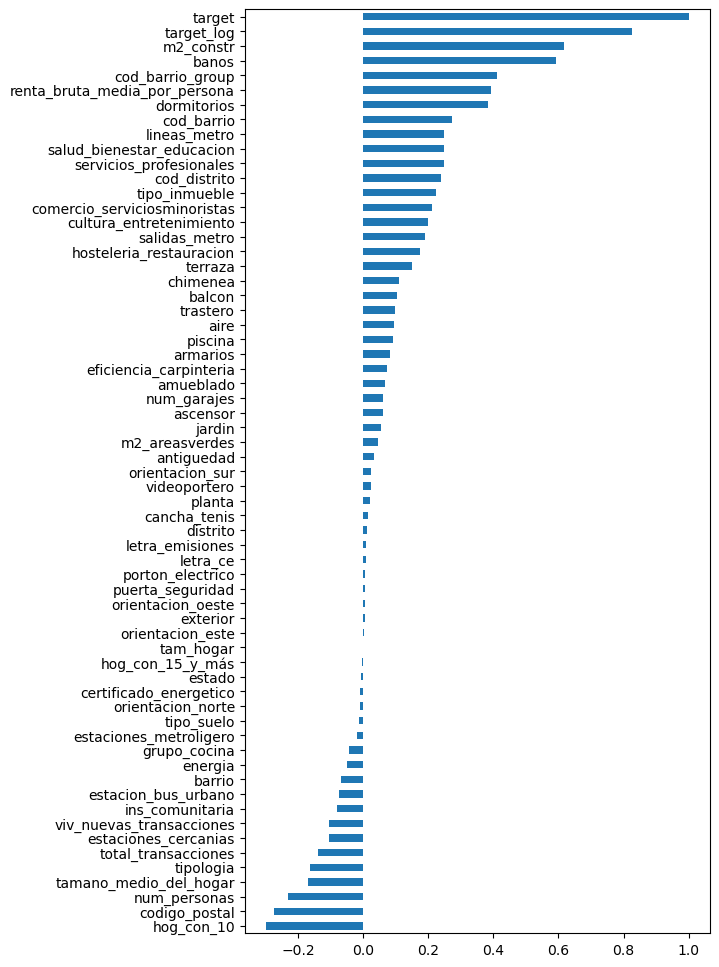

In [96]:
# Matriz de correlación
correlacion_train = df_train_encoded.corr()

# Visualizar la correlación de las variables con el target
plt.figure(figsize=(6, 12))
correlacion_train['target'].sort_values().plot(kind='barh')

In [97]:
# Identificar variables con una correlación mayor que el 19% a la variable target
correlacion_train = df_train_encoded.corr()['target'].abs().sort_values(ascending=False)
alta_correlacion_train = correlacion_train[correlacion_train >= 0.19]

# Crear DataFrame con variables correladas
df_train_correlacion = pd.DataFrame({
    'variable': alta_correlacion_train.index,
    'correlacion_train': alta_correlacion_train.values
})

print("Resumen de correlación en df train:")
df_train_correlacion.sort_values(by = 'correlacion_train',ascending = False).style.background_gradient()

Resumen de correlación en df train:


,variable,correlacion_train
0,target,1.000000
1,target_log,0.826081
2,m2_constr,0.618292
3,banos,0.591509
4,cod_barrio_group,0.411691
5,renta_bruta_media_por_persona,0.392337
6,dormitorios,0.382456
7,hog_con_10,0.299800
8,codigo_postal,0.273423
9,cod_barrio,0.272863


In [98]:
# Identificar variables con una correlación mayor que el 19% a la variable target
correlacion_test = df_test_encoded.corr()['target'].abs().sort_values(ascending=False)
alta_correlacion_test = correlacion_test[correlacion_test >= 0.19]

# Crear DataFrame con variables correladas
df_test_correlacion = pd.DataFrame({
    'variable': alta_correlacion_test.index,
    'correlacion_test': alta_correlacion_test.values
})

print("Resumen de correlación en df test:")
df_test_correlacion.sort_values(by = 'correlacion_test',ascending = False).style.background_gradient()

Resumen de correlación en df test:


,variable,correlacion_test
0,target,1.000000
1,target_log,0.831457
2,banos,0.562405
3,m2_constr,0.468572
4,cod_barrio_group,0.401189
5,dormitorios,0.390009
6,renta_bruta_media_por_persona,0.383343
7,hog_con_10,0.297921
8,codigo_postal,0.295530
9,salud_bienestar_educacion,0.272909


Se han seleccionado 18 variables con alta correlación con la variable target (precio), usando como umbral mínimo una correlación aparente de aproximadamente > 0.19. Esto incluye variables estructurales del inmueble, como m2_constr, banos, y otras socioeconómicas del entorno, como renta_bruta_media_por_persona.

Seleccionar variables con mayor relación con el precio es útil para asegurar que los clústers creados con KMeans sean relevantes desde el punto de vista del negocio (segmentación por valor). Esto reduce la dimensionalidad y mejora el rendimiento del modelo.

También se hace lo mismo con el conjunto de prueba (df_test_var_ppal) para mantener consistencia. Esto es coherente si más adelante se desea hacer validación o comparación de clústers fuera de entrenamiento.

In [99]:
# Nuevo dataframe con solo las variables con alta correlación
df_train_var_ppal = df_train_encoded[alta_correlacion_train.index]

# Print information about the new DataFrame
print("\nShape de las variables seleccionadas:", df_train_var_ppal.shape)
print("\nVariables seleccionadas:")
for var, corr in zip(df_train_correlacion['variable'], df_train_correlacion['correlacion_train']):
    print(f"{var}: {corr:.3f}")


Shape de las variables seleccionadas: (7889, 18)

Variables seleccionadas:
target: 1.000
target_log: 0.826
m2_constr: 0.618
banos: 0.592
cod_barrio_group: 0.412
renta_bruta_media_por_persona: 0.392
dormitorios: 0.382
hog_con_10: 0.300
codigo_postal: 0.273
cod_barrio: 0.273
lineas_metro: 0.249
salud_bienestar_educacion: 0.248
servicios_profesionales: 0.247
cod_distrito: 0.240
num_personas: 0.231
tipo_inmueble: 0.222
comercio_serviciosminoristas: 0.212
cultura_entretenimiento: 0.198


In [100]:
# Nuevo dataframe con solo las variables con alta correlación
df_test_var_ppal = df_test_encoded[alta_correlacion_test.index]

# Print information about the new DataFrame
print("\nShape de las variables seleccionadas:", df_test_var_ppal.shape)
print("\nVariables seleccionadas:")
for var, corr in zip(df_test_correlacion['variable'], df_test_correlacion['correlacion_test']):
    print(f"{var}: {corr:.3f}")


Shape de las variables seleccionadas: (1973, 18)

Variables seleccionadas:
target: 1.000
target_log: 0.831
banos: 0.562
m2_constr: 0.469
cod_barrio_group: 0.401
dormitorios: 0.390
renta_bruta_media_por_persona: 0.383
hog_con_10: 0.298
codigo_postal: 0.296
salud_bienestar_educacion: 0.273
cod_barrio: 0.271
servicios_profesionales: 0.269
num_personas: 0.255
lineas_metro: 0.250
cod_distrito: 0.241
comercio_serviciosminoristas: 0.232
cultura_entretenimiento: 0.226
tipo_inmueble: 0.192


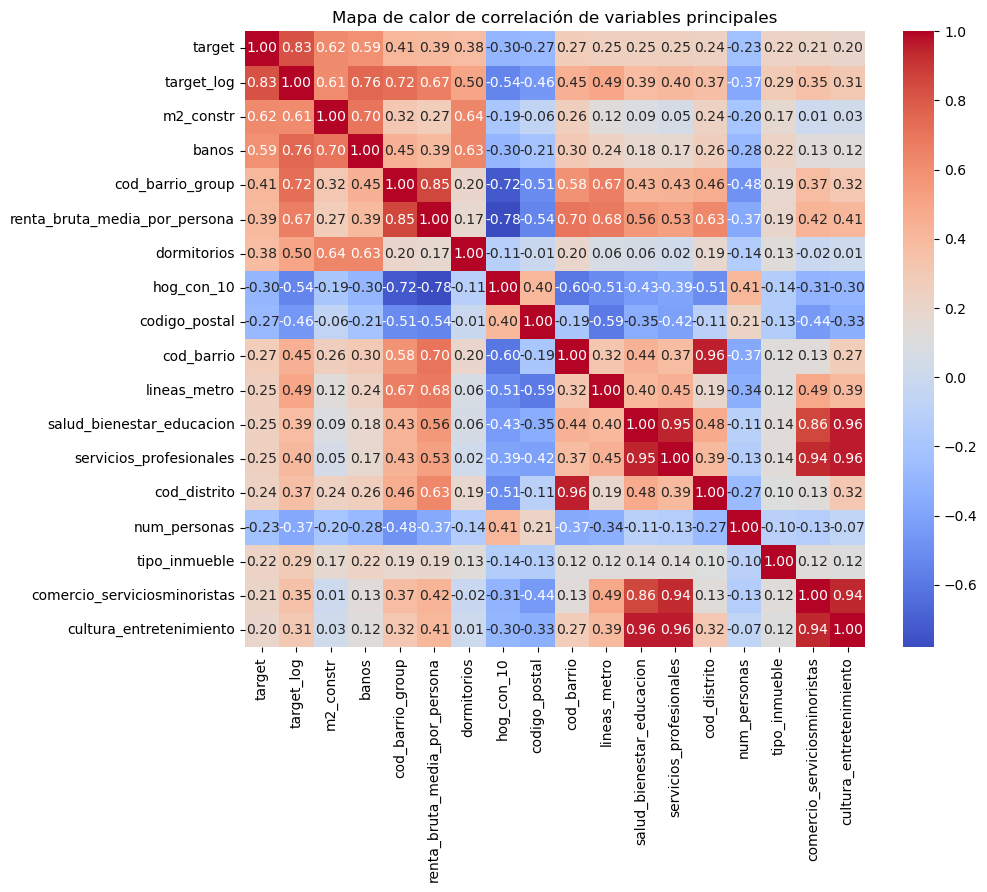

In [101]:
# Visualizar nuevo df_train_var_ppal en un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_var_ppal.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación de variables principales')
plt.show()

In [102]:
df_train_var_ppal.head(2)

,target,target_log,m2_constr,banos,cod_barrio_group,renta_bruta_media_por_persona,dormitorios,hog_con_10,codigo_postal,cod_barrio,lineas_metro,salud_bienestar_educacion,servicios_profesionales,cod_distrito,num_personas,tipo_inmueble,comercio_serviciosminoristas,cultura_entretenimiento
2771,979000.00,13.79,109.00,4.00,3,27030.00,4.00,43.00,12,46,7.00,137.00,582.00,0,8164.00,0,1208.00,259.00
801,725000.00,13.49,151.00,3.00,4,28798.00,5.00,53.00,45,115,3.00,148.00,121.00,19,3421.00,0,197.00,99.00


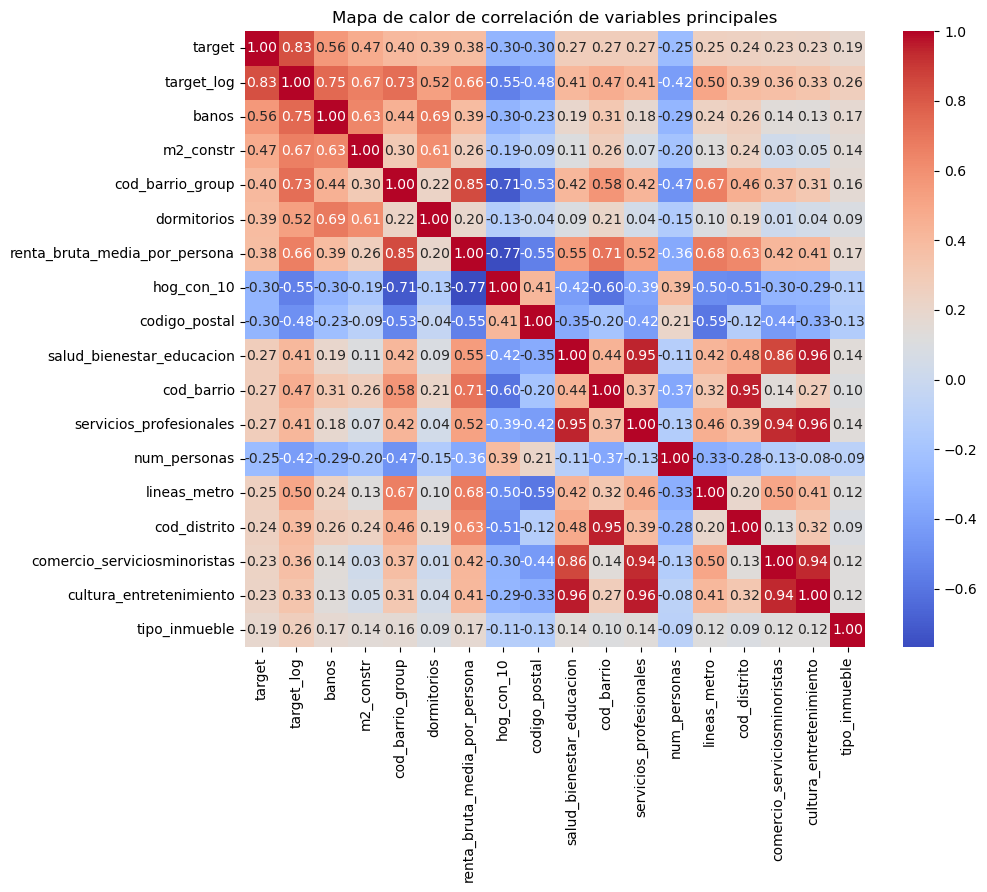

In [103]:
# Visualizar nuevo df_test_var_ppal en un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_test_var_ppal.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación de variables principales')
plt.show()

Este mapa de calor ayuda a visualizar la fuerza de relación entre las variables seleccionadas.
- Correlaciones fuertes entre m2_constr, banos y target.
- La mayoría de correlaciones entre variables no son mayores a ±0.8 así que podemos decir que tenemo baja multicolinealidad.

In [104]:
df_test_var_ppal.head(2)

,target,target_log,banos,m2_constr,cod_barrio_group,dormitorios,renta_bruta_media_por_persona,hog_con_10,codigo_postal,salud_bienestar_educacion,cod_barrio,servicios_profesionales,num_personas,lineas_metro,cod_distrito,comercio_serviciosminoristas,cultura_entretenimiento,tipo_inmueble
5467,380000.00,12.85,1.00,65.00,3,2.00,38751.00,11.00,26,928.00,94,2315.00,41964.00,6.00,15,2470.00,917.00,0
6768,2300000.00,14.65,11.00,500.00,4,11.00,36592.00,26.00,21,235.00,126,347.00,7156.00,6.00,20,532.00,207.00,0


## *4.4. Reducción de dimensionalidad*
Reducir el número de variables del dataset manteniendo la mayor cantidad de información posible. Esto facilita la visualización, mejora el rendimiento de los algoritmos de clustering y reduce el ruido en los datos.

In [105]:
# Ordenar las columnas alfabéticamente y verificar la coherencia entre los conjuntos de datos
def sort_and_verify_columns(train_df, test_df):
    """
    Sort columns alphabetically and verify consistency between datasets
    
    Parameters:
    -----------
    train_df : pandas.DataFrame
        Training dataset
    test_df : pandas.DataFrame
        Test dataset
    
    Returns:
    --------
    train_df_sorted : pandas.DataFrame
        Training dataset with sorted columns
    test_df_sorted : pandas.DataFrame
        Test dataset with sorted columns
    """
    # Guardar shapes originales
    train_shape_original = train_df.shape
    test_shape_original = test_df.shape
    
    # Ordenar columnas
    train_df_sorted = train_df.reindex(sorted(train_df.columns), axis=1)
    test_df_sorted = test_df.reindex(sorted(test_df.columns), axis=1)
    
    # Verificar el orden
    print("\nVerificación del orden:")
    print("-" * 50)
    
    # Verificar shapes
    print("\nVerificación de shapes:")
    print(f"Train: {train_shape_original} -> {train_df_sorted.shape}")
    print(f"Test: {test_shape_original} -> {test_df_sorted.shape}")
    
    # Verificar el orden de las columnas
    columns_match = (train_df_sorted.columns == test_df_sorted.columns).all()
    print(f"\nCoincidencia de columnas entre train y test: {columns_match}")
    
    if not columns_match:
        print("\nColumnas diferentes:")
        print("Sólo en train:", set(train_df_sorted.columns) - set(test_df_sorted.columns))
        print("Sólo en test:", set(test_df_sorted.columns) - set(train_df_sorted.columns))
    
    # Verificar
    print("\nPrimeras 5 columnas:")
    print("Train:", train_df_sorted.columns[:5].tolist())
    print("Test:", test_df_sorted.columns[:5].tolist())
    
    return train_df_sorted, test_df_sorted

# Aplicar
df_train_var_ppal, df_test_var_ppal = sort_and_verify_columns(df_train_var_ppal, df_test_var_ppal)


Verificación del orden:
--------------------------------------------------

Verificación de shapes:
Train: (7889, 18) -> (7889, 18)
Test: (1973, 18) -> (1973, 18)

Coincidencia de columnas entre train y test: True

Primeras 5 columnas:
Train: ['banos', 'cod_barrio', 'cod_barrio_group', 'cod_distrito', 'codigo_postal']
Test: ['banos', 'cod_barrio', 'cod_barrio_group', 'cod_distrito', 'codigo_postal']


In [106]:
# Guardar los dataframes ordenados
df_train_var_ppal.to_csv('df_train_var_ppal_sorted.csv', index=False)
df_test_var_ppal.to_csv('df_test_var_ppal_sorted.csv', index=False)

In [107]:
# Preparar los datos para el escalado gestionando los valores infinitos y los valores atípicos
def prepare_data_for_scaling(df):
    df_clean = df.copy()
    
    # Reemplazar los valores infinito con NaN
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    
    # Gestión de valores extremadamente grandes y valores NaN
    for column in df_clean.columns:
        # Estadísticas
        median = df_clean[column].median()
        q1 = df_clean[column].quantile(0.25)
        q3 = df_clean[column].quantile(0.75)
        iqr = q3 - q1
        
        # Definir límites para valores atípicos
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        
        # Reemplazar valores extremos con límites
        df_clean[column] = df_clean[column].clip(lower_bound, upper_bound)
        
        # Rellenar los valores NaN restantes con la mediana
        df_clean[column] = df_clean[column].fillna(median)
    
    return df_clean

# Preparar ambos datasets
df_train_prepared = prepare_data_for_scaling(df_train_var_ppal)
df_test_prepared = prepare_data_for_scaling(df_test_var_ppal)

# Crear y hacer fit del scaler a los datos de train
scaler = RobustScaler()
scaler.fit(df_train_prepared)

# Transformar ambos datasets
df_train_scaled = pd.DataFrame(
    scaler.transform(df_train_prepared),
    columns=df_train_prepared.columns
)

df_test_scaled = pd.DataFrame(
    scaler.transform(df_test_prepared),
    columns=df_test_prepared.columns
)


# Verificar resultados
print("\nShapes finales:")
print("Train:", df_train_scaled.shape)
print("Test:", df_test_scaled.shape)

# Comprobar que el orden de las columnas coincide
print("\nCoincidencia de orden de columnas:", 
      (df_train_scaled.columns == df_test_scaled.columns).all())

# Comprobar si quedan problemas
def verify_scaling(df_scaled, name="Dataset"):
    print(f"\nVerificando {name}:")
    print("Valores infinitos:", df_scaled.isin([np.inf, -np.inf]).sum().sum())
    print("Valores nulos:", df_scaled.isna().sum().sum())

verify_scaling(df_train_scaled, "Training data")
verify_scaling(df_test_scaled, "Test data")


Shapes finales:
Train: (7889, 18)
Test: (1973, 18)

Coincidencia de orden de columnas: True

Verificando Training data:
Valores infinitos: 0
Valores nulos: 0

Verificando Test data:
Valores infinitos: 0
Valores nulos: 0


- Nos aseguramos que ambos datasets tengan exactamente las mismas variables y en el mismo orden, lo cual es fundamental antes de aplicar un modelo o transformación. Si hay alguna diferencia, el código la detecta y la imprime.
- Esto mejora la calidad del dataset y evita que valores extremos o inválidos distorsionen el análisis de componentes principales. Se utiliza la mediana porque no se ve tan afectada por los valores atípicos.
- Utilizamos RobustScaler para escalar los datos. A diferencia de otros métodos como StandardScaler (media y desviación estándar), este scaler:
    -  Utiliza la mediana y el rango intercuartílico (IQR).
    -  Es más robusto frente a valores atípicos, ya que no se ve afectado por ellos en la misma medida y preservar relaciones internas en los datos sin que outliers dominen el escalado.

In [108]:
df_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
banos,7889.00,0.05,1.18,-1.00,-1.00,0.00,0.00,3.00
cod_barrio,7889.00,-0.06,0.56,-1.03,-0.58,0.00,0.42,0.88
cod_barrio_group,7889.00,-0.17,0.49,-1.00,-0.67,0.00,0.33,0.33
cod_distrito,7889.00,-0.11,0.54,-0.85,-0.69,0.00,0.31,0.69
codigo_postal,7889.00,0.15,0.61,-0.70,-0.35,0.00,0.65,1.35
comercio_serviciosminoristas,7889.00,0.00,0.88,-1.51,-0.64,0.00,0.36,1.57
cultura_entretenimiento,7889.00,-0.05,0.87,-1.37,-0.70,0.00,0.30,1.39
dormitorios,7889.00,-0.22,1.23,-3.00,-1.00,0.00,0.00,3.00
hog_con_10,7889.00,0.11,0.88,-0.98,-0.54,0.00,0.46,2.34
lineas_metro,7889.00,-0.27,0.58,-1.25,-0.75,0.00,0.25,0.75


In [109]:
df_train_scaled['m2_constr'].between(-1,1).mean(), df_train_scaled['m2_constr'].std()

(0.8107491443782482, 1.08753801537384)

In [110]:
df_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
banos,1973.00,0.08,1.28,-1.00,-1.00,0.00,1.00,7.00
cod_barrio,1973.00,-0.05,0.56,-1.03,-0.57,0.00,0.42,0.88
cod_barrio_group,1973.00,-0.15,0.49,-1.00,-0.67,0.00,0.33,0.33
cod_distrito,1973.00,-0.10,0.53,-0.85,-0.69,0.00,0.38,0.69
codigo_postal,1973.00,0.14,0.60,-0.70,-0.35,-0.04,0.61,1.35
comercio_serviciosminoristas,1973.00,-0.01,0.88,-1.51,-0.64,0.00,0.36,1.57
cultura_entretenimiento,1973.00,-0.06,0.88,-1.37,-0.70,-0.40,0.31,1.39
dormitorios,1973.00,-0.24,1.23,-3.00,-1.00,0.00,0.00,3.00
hog_con_10,1973.00,0.07,0.85,-0.98,-0.54,0.00,0.46,2.34
lineas_metro,1973.00,-0.25,0.59,-1.25,-0.75,0.00,0.25,0.75


In [60]:
df_test_scaled['m2_constr'].between(-1,1).mean(), df_test_scaled['m2_constr'].std()

(0.806386213887481, 1.1058201841100002)

- Revisamos la distribución de una variable concreta (m2_constr) en el dataset escalado.
- Calculamos qué porcentaje de valores está entre -1 y 1 y cuál es la desviación estándar.
- Este tipo de verificación sirve para comprobar que el escalado realmente ha reducido la dispersión.
- También ayuda a detectar variables que, tras el escalado, siguen presentando una dispersión mayor a la esperada (lo cual puede afectar al clustering).

# *5. Clustering de viviendas*

In [61]:
# Save the target column for later analysis
target_train = df_train_var_ppal['target']
target_test = df_test_var_ppal['target']
target_log_train = df_train_var_ppal['target_log']
target_log_test = df_test_var_ppal['target_log']

# Drop target column from both datasets
X_train = df_train_var_ppal.drop(['target', 'target_log'], axis=1)
X_test = df_test_var_ppal.drop(['target', 'target_log'], axis=1)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7889 entries, 2771 to 708
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   banos                          7889 non-null   float64
 1   cod_barrio                     7889 non-null   int64  
 2   cod_barrio_group               7889 non-null   int64  
 3   cod_distrito                   7889 non-null   int64  
 4   codigo_postal                  7889 non-null   int64  
 5   comercio_serviciosminoristas   7889 non-null   float64
 6   cultura_entretenimiento        7889 non-null   float64
 7   dormitorios                    7889 non-null   float64
 8   hog_con_10                     7889 non-null   float64
 9   lineas_metro                   7889 non-null   float64
 10  m2_constr                      7889 non-null   float64
 11  num_personas                   7889 non-null   float64
 12  renta_bruta_media_por_persona  7889 non-null   floa

In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 5467 to 6268
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   banos                          1973 non-null   float64
 1   cod_barrio                     1973 non-null   int64  
 2   cod_barrio_group               1973 non-null   int64  
 3   cod_distrito                   1973 non-null   int64  
 4   codigo_postal                  1973 non-null   int64  
 5   comercio_serviciosminoristas   1973 non-null   float64
 6   cultura_entretenimiento        1973 non-null   float64
 7   dormitorios                    1973 non-null   float64
 8   hog_con_10                     1973 non-null   float64
 9   lineas_metro                   1973 non-null   float64
 10  m2_constr                      1973 non-null   float64
 11  num_personas                   1973 non-null   float64
 12  renta_bruta_media_por_persona  1973 non-null   flo

Aunque el clustering es un método no supervisado, guardar la variable target permite evaluar ex post si los clusters se relacionan con patrones conocidos en el valor de la vivienda (por ejemplo, si ciertos clusters agrupan viviendas más caras que otras).

## *5.1. K-Means*
Aplicar el algoritmo K-Means para segmentar las viviendas en grupos (clusters) similares según sus características. Para ello, primero se determina el número óptimo de clusters mediante tres métricas:
- Inertia (Elbow Method)
    - Mide la suma de las distancias al centroide dentro de cada cluster.
    - Cuanto menor, mejor... pero con k crecientes siempre disminuye. Por eso se busca el “codo” (elbow) en la gráfica, donde la mejora empieza a disminuir.
- Silhouette Score
    - Evalúa qué tan bien separados están los clusters y qué tan compactos son internamente.
    - Valores cercanos a 1 indican buena separación; cercanos a 0, se solapan.
- Calinski-Harabasz Score
    - Cuantifica la dispersión entre clusters frente a la dispersión dentro de los clusters.
    - Cuanto mayor, mejor.

K=2:
  Inertia: 1068004083010.26
  Silhouette Score: 0.465
  Calinski-Harabasz Score: 8907.152
K=3:
  Inertia: 756146779753.29
  Silhouette Score: 0.418
  Calinski-Harabasz Score: 7915.775
K=4:
  Inertia: 513290126218.35
  Silhouette Score: 0.446
  Calinski-Harabasz Score: 9016.591
K=5:
  Inertia: 411549576395.83
  Silhouette Score: 0.458
  Calinski-Harabasz Score: 8920.398
K=6:
  Inertia: 322668211812.54
  Silhouette Score: 0.483
  Calinski-Harabasz Score: 9535.202
K=7:
  Inertia: 249854726323.48
  Silhouette Score: 0.477
  Calinski-Harabasz Score: 10643.183
K=8:
  Inertia: 207664402542.50
  Silhouette Score: 0.492
  Calinski-Harabasz Score: 11203.498
K=9:
  Inertia: 171348233204.01
  Silhouette Score: 0.505
  Calinski-Harabasz Score: 12088.015
K=10:
  Inertia: 142569566706.71
  Silhouette Score: 0.524
  Calinski-Harabasz Score: 13088.911


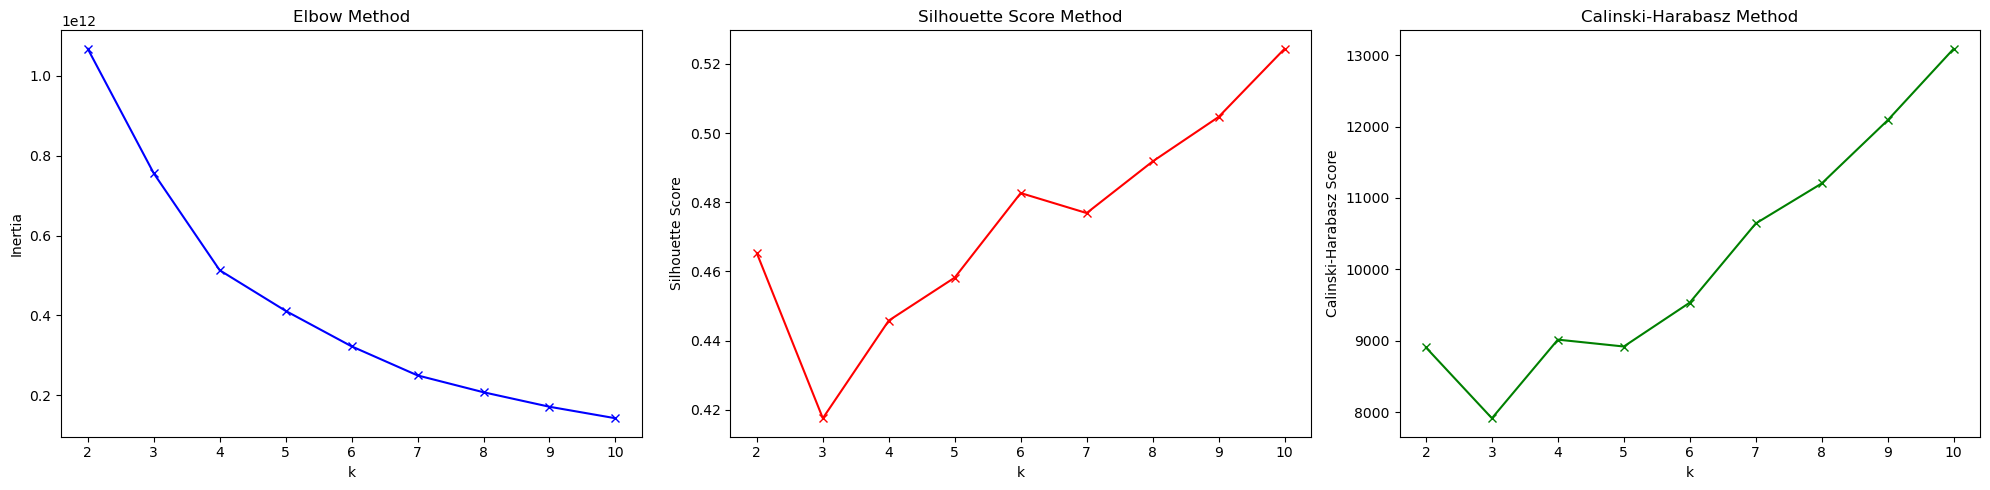


Optimal number of clusters:
Elbow method: 4
Silhouette score: 10
Calinski-Harabasz score: 10


In [64]:
def find_optimal_clusters(X, max_clusters=10):
    """
    Find optimal number of clusters using multiple methods:
    - Elbow method
    - Silhouette score
    - Calinski-Harabasz score
    """
    inertias = []
    silhouette_scores = []
    calinski_scores = []
    k_values = range(2, max_clusters + 1)
    
    for k in k_values:
        # Train KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        calinski_scores.append(calinski_harabasz_score(X, kmeans.labels_))
        
        print(f"K={k}:")
        print(f"  Inertia: {kmeans.inertia_:.2f}")
        print(f"  Silhouette Score: {silhouette_scores[-1]:.3f}")
        print(f"  Calinski-Harabasz Score: {calinski_scores[-1]:.3f}")
    
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    # Elbow curve
    ax1.plot(k_values, inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    # Silhouette score
    ax2.plot(k_values, silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score Method')
    
    # Calinski-Harabasz score
    ax3.plot(k_values, calinski_scores, 'gx-')
    ax3.set_xlabel('k')
    ax3.set_ylabel('Calinski-Harabasz Score')
    ax3.set_title('Calinski-Harabasz Method')
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal k for each method
    optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
    optimal_k_calinski = k_values[np.argmax(calinski_scores)]
    
    # Find elbow point using the knee locator
    kn = KneeLocator(list(k_values), inertias, curve='convex', direction='decreasing')
    optimal_k_elbow = kn.elbow
    
    print("\nOptimal number of clusters:")
    print(f"Elbow method: {optimal_k_elbow}")
    print(f"Silhouette score: {optimal_k_silhouette}")
    print(f"Calinski-Harabasz score: {optimal_k_calinski}")
    
    return {
        'k_values': k_values,
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'calinski_scores': calinski_scores,
        'optimal_k_elbow': optimal_k_elbow,
        'optimal_k_silhouette': optimal_k_silhouette,
        'optimal_k_calinski': optimal_k_calinski
    }

# Find optimal clusters
results = find_optimal_clusters(X_train, max_clusters=10)

- Se grafican las tres métricas para comparar y tomar una decisión fundamentada.
- Se utiliza la librería KneeLocator para detectar automáticamente el "codo" en la curva de Inertia.
- Se entrena el modelo K-Means con diferentes valores de k y se almacenan los resultados:
    - inertias: Para el método del codo.
    - silhouette_scores: Para la calidad de separación.
    - calinski_scores: Para comparar compactación y dispersión.
- Se identifican los k óptimos sugeridos por cada métrica.

In [65]:
# Create a function to evaluate a specific k
def evaluate_kmeans(X, k):
    """
    Evaluate KMeans clustering for a specific k value
    """
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    metrics = {
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels)
    }
    
    return kmeans, metrics

# Compare results for different k values
def compare_k_values(X, k_values):
    """
    Compare clustering results for different k values
    """
    results_dict = {}
    
    for k in k_values:
        model, metrics = evaluate_kmeans(X, k)
        results_dict[k] = metrics
        
        print(f"\nResults for k={k}:")
        print(f"Inertia: {metrics['inertia']:.2f}")
        print(f"Silhouette Score: {metrics['silhouette']:.3f}")
        print(f"Calinski-Harabasz Score: {metrics['calinski_harabasz']:.3f}")
    
    return results_dict

# Get suggested k values from different methods
suggested_k_values = set([
    results['optimal_k_elbow'],
    results['optimal_k_silhouette'],
    results['optimal_k_calinski']
])

print("\nComparing suggested k values:")
comparison_results = compare_k_values(X_train, suggested_k_values)


Comparing suggested k values:

Results for k=10:
Inertia: 142569566706.71
Silhouette Score: 0.524
Calinski-Harabasz Score: 13088.911

Results for k=4:
Inertia: 513290126218.35
Silhouette Score: 0.446
Calinski-Harabasz Score: 9016.591


Una vez definido el valor de k, esta función entrena el modelo y devuelve:
- Las etiquetas de cluster asignadas.
- Métricas clave (inertia, silhouette, Calinski-Harabasz).

Permite elegir un k y ver cómo se comporta el clustering. Esto es útil para comparar varios k candidatos y ver cuál genera una segmentación más lógica o interpretable.

In [66]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=10, random_state=42, n_init=10)
train_clusters = kmeans_model.fit_predict(X_train)

In [67]:
def analyze_training_clusters(X_train, train_clusters, target_train, kmeans_model):
    """
    Comprehensive analysis of training clusters
    """
    # Create DataFrame with clusters and target
    cluster_df = pd.DataFrame({
        'Cluster': train_clusters,
        'Target': target_train
    })
    
    # Add original features
    cluster_df = pd.concat([cluster_df, X_train.reset_index(drop=True)], axis=1)
    
    print("1. Basic Cluster Statistics")
    print("-" * 50)
    
    # Cluster sizes
    cluster_sizes = cluster_df['Cluster'].value_counts().sort_index()
    print("\nCluster sizes:")
    print(cluster_sizes)
    
    # Visualize cluster sizes
    plt.figure(figsize=(10, 5))
    cluster_sizes.plot(kind='bar')
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    plt.show()
    
    print("\n2. Target Variable Analysis")
    print("-" * 50)
    
    # Target statistics by cluster
    target_stats = cluster_df.groupby('Cluster')['Target'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    print("\nTarget statistics by cluster:")
    print(target_stats)
    
    # Visualize target distribution by cluster
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y='Target', data=cluster_df)
    plt.title('Target Distribution by Cluster')
    plt.tight_layout()
    plt.show()
    
    # ANOVA test for target differences between clusters
    f_stat, p_value = stats.f_oneway(*[
        cluster_df[cluster_df['Cluster'] == c]['Target'] 
        for c in range(len(cluster_sizes))
    ])
    print("\nANOVA test for target differences between clusters:")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    print("\n3. Feature Analysis")
    print("-" * 50)
    
    # Calculate cluster centers
    cluster_centers = pd.DataFrame(
        kmeans_model.cluster_centers_,
        columns=X_train.columns
    )
    
    # Feature importance based on cluster centers
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': np.std(cluster_centers, axis=0)
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 most important features:")
    print(feature_importance.head(10))
    
    # Visualize top features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', 
                data=feature_importance.head(10))
    plt.title('Top 10 Features by Importance')
    plt.tight_layout()
    plt.show()
    
    # Heatmap of cluster centers
    plt.figure(figsize=(15, 8))
    sns.heatmap(cluster_centers.T, cmap='coolwarm', center=0,
                yticklabels=X_train.columns)
    plt.title('Cluster Centers Heatmap')
    plt.tight_layout()
    plt.show()
    
    print("\n4. Cluster Profiles")
    print("-" * 50)
    
    # Create cluster profiles
    for cluster in range(len(cluster_sizes)):
        print(f"\nCluster {cluster} Profile:")
        print("-" * 30)
        
        # Get cluster data
        cluster_data = cluster_df[cluster_df['Cluster'] == cluster]
        
        # Basic statistics
        print(f"Size: {len(cluster_data)} samples")
        print(f"Target mean: {cluster_data['Target'].mean():.2f}")
        print(f"Target std: {cluster_data['Target'].std():.2f}")
        
        # Most distinctive features
        cluster_mean = cluster_data.mean()
        overall_mean = cluster_df.mean()
        std_dev = cluster_df.std()
        
        z_scores = (cluster_mean - overall_mean) / std_dev
        top_features = z_scores.sort_values(ascending=False)
        
        print("\nMost distinctive features (z-scores):")
        print(top_features.head(5))
        print("\nLeast distinctive features (z-scores):")
        print(top_features.tail(5))
    
    return {
        'cluster_sizes': cluster_sizes,
        'target_stats': target_stats,
        'feature_importance': feature_importance,
        'cluster_centers': cluster_centers
    }

1. Basic Cluster Statistics
--------------------------------------------------

Cluster sizes:
Cluster
0.00     512
1.00    1496
2.00     708
3.00     870
4.00    1072
5.00     923
6.00     875
7.00     471
8.00     648
9.00     314
Name: count, dtype: int64


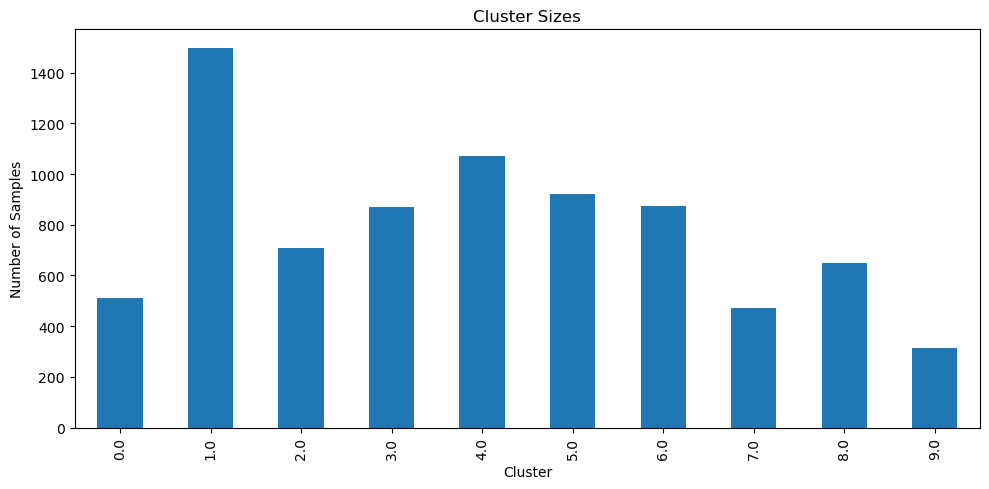


2. Target Variable Analysis
--------------------------------------------------

Target statistics by cluster:
         count       mean        std  min         max
Cluster                                              
0.00       512  216765.51  190680.95 0.00  1600000.00
1.00      1496 1388536.17 1562754.68 0.00 19950000.00
2.00       708  178295.62  151642.00 0.00  1950000.00
3.00       870  486290.79  531848.40 0.00  3670000.00
4.00      1072  980636.40 1038655.68 0.00 11000000.00
5.00       923  808275.89 1185397.80 0.00 13900000.00
6.00       875  672626.00  910178.83 0.00  6950000.00
7.00       471  455347.98  753323.51 0.00 11500000.00
8.00       648  170552.34  119266.81 0.00   880000.00
9.00       314  391037.10  636082.64 0.00  6200000.00


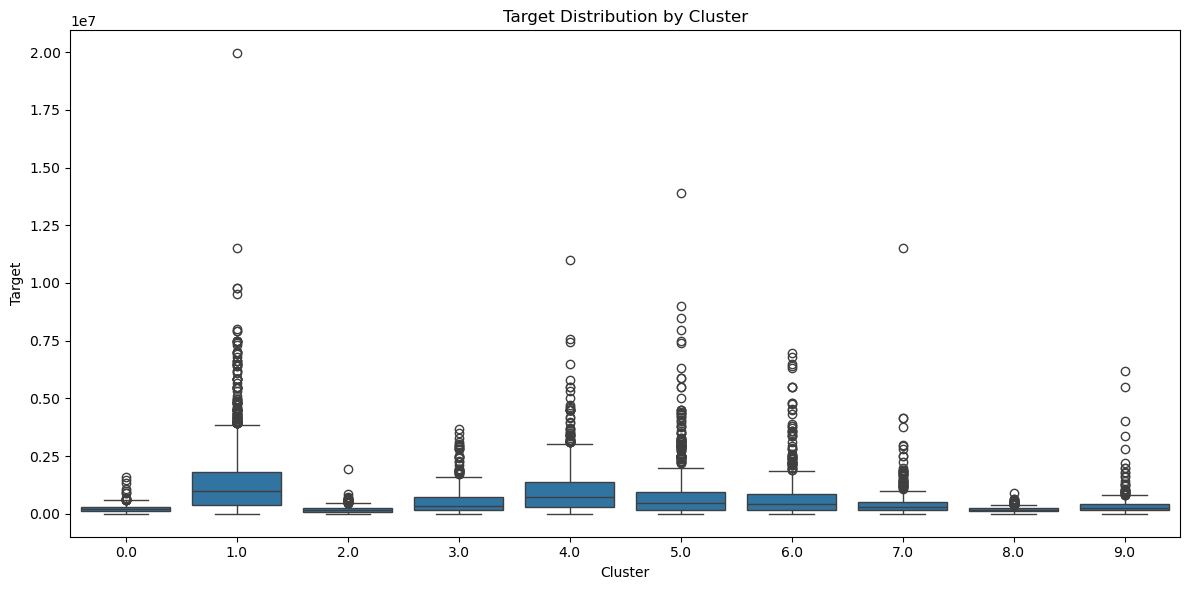


ANOVA test for target differences between clusters:
F-statistic: 162.82
p-value: 0.0000

3. Feature Analysis
--------------------------------------------------

Top 10 most important features:
                                                     Feature  Importance
num_personas                                    num_personas    16298.82
renta_bruta_media_por_persona  renta_bruta_media_por_persona     8196.50
servicios_profesionales              servicios_profesionales      387.60
comercio_serviciosminoristas    comercio_serviciosminoristas      315.19
salud_bienestar_educacion          salud_bienestar_educacion      179.66
cultura_entretenimiento              cultura_entretenimiento      135.77
m2_constr                                          m2_constr       38.03
hog_con_10                                        hog_con_10       28.70
cod_barrio                                        cod_barrio       26.18
codigo_postal                                  codigo_postal        8.10


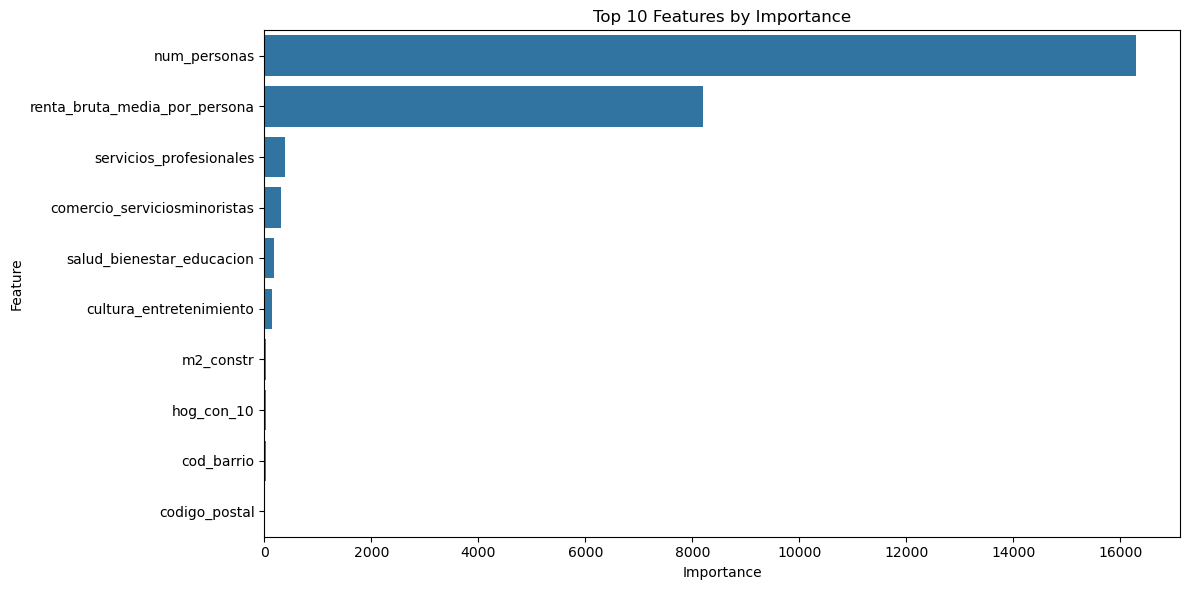

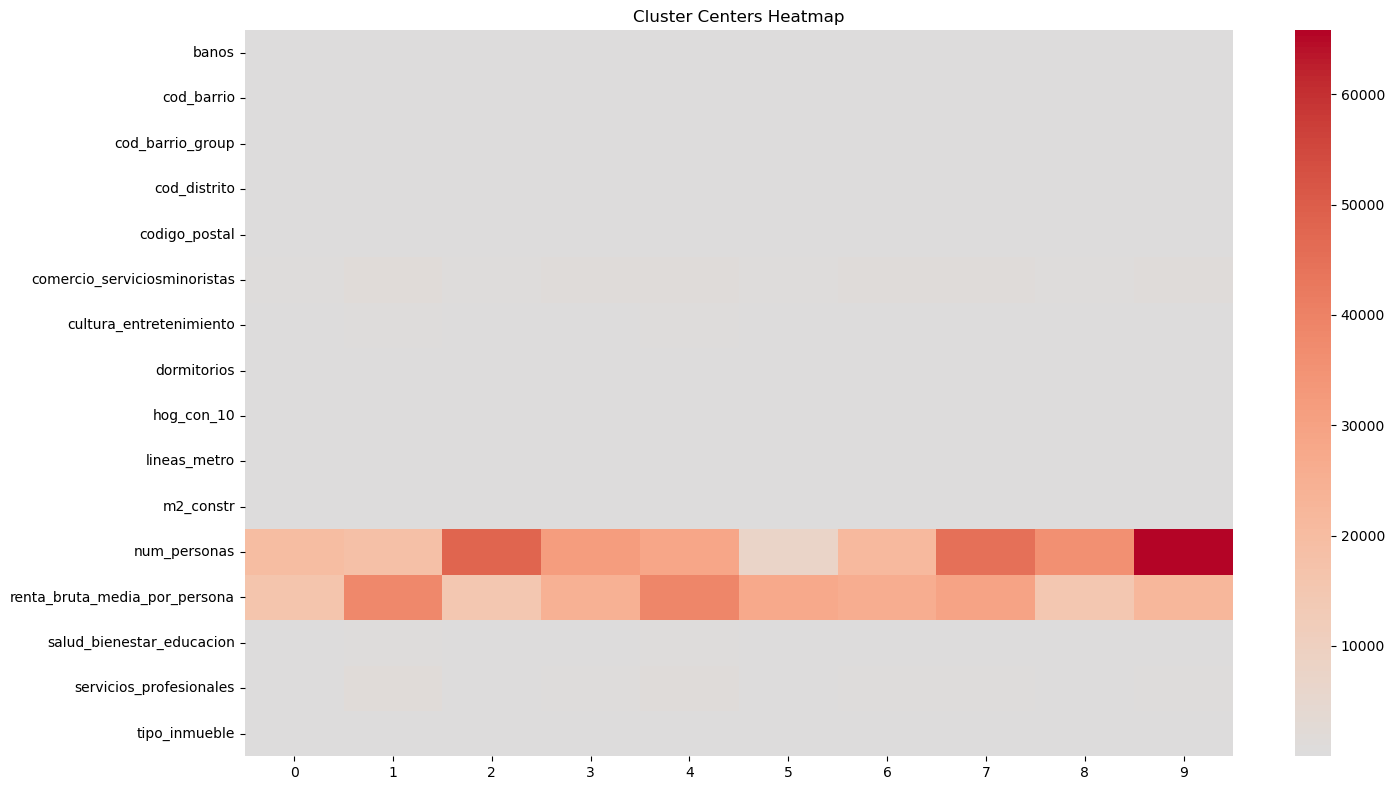


4. Cluster Profiles
--------------------------------------------------

Cluster 0 Profile:
------------------------------
Size: 512 samples
Target mean: 216765.51
Target std: 190680.95

Most distinctive features (z-scores):
hog_con_10       0.13
codigo_postal    0.05
m2_constr        0.03
dormitorios      0.01
banos           -0.01
dtype: float64

Least distinctive features (z-scores):
cod_barrio                      -0.09
cod_distrito                    -0.09
renta_bruta_media_por_persona   -0.17
Target                          -0.46
Cluster                         -1.53
dtype: float64

Cluster 1 Profile:
------------------------------
Size: 1496 samples
Target mean: 1388536.17
Target std: 1562754.68

Most distinctive features (z-scores):
Target                      0.64
servicios_profesionales     0.02
salud_bienestar_educacion   0.02
cod_distrito                0.02
cultura_entretenimiento     0.02
dtype: float64

Least distinctive features (z-scores):
m2_constr       -0.02
hog_con

In [68]:
# Run the analysis
analysis_results = analyze_training_clusters(
    X_train, 
    train_clusters, 
    target_train, 
    kmeans_model
)

In [69]:
# 5. Additional visualization with PCA
def plot_clusters_with_target(X_train, train_clusters, target_train, kmeans_model):
    from sklearn.decomposition import PCA
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=target_train, 
                         cmap='viridis',
                         alpha=0.6)
    
    # Add cluster centers
    centers_pca = pca.transform(kmeans_model.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
               c='red', marker='x', s=200, linewidths=3,
               label='Cluster centers')
    
    plt.colorbar(scatter, label='Target Value')
    plt.title('PCA Visualization with Target Values')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print explained variance
    print("\nPCA explained variance ratio:")
    print(pca.explained_variance_ratio_)

/opt/anaconda3/envs/Nuclio/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


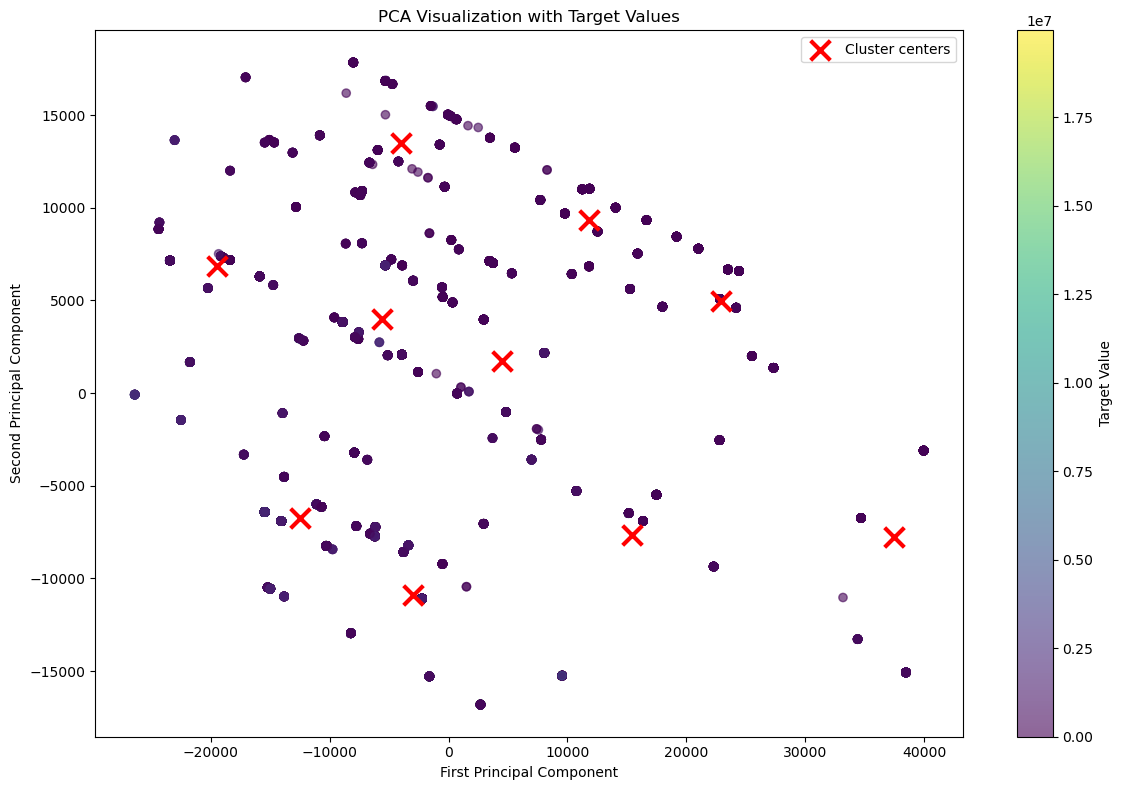


PCA explained variance ratio:
[0.76202155 0.23465777]


In [70]:
# 6. Plot clusters with target values
plot_clusters_with_target(X_train, train_clusters, target_train, kmeans_model)

In [71]:
# Save results if needed
analysis_summary = {
    'cluster_sizes': analysis_results['cluster_sizes'].to_dict(),
    'target_stats': analysis_results['target_stats'].to_dict(),
    'top_features': analysis_results['feature_importance'].head(10).to_dict(),
    'cluster_centers': analysis_results['cluster_centers'].to_dict()
}

# Optional: Add clusters to original dataframe
df_train_var_ppal['Cluster'] = train_clusters
df_test_var_ppal['Cluster'] = kmeans_model.predict(X_test)

print("\nShape of final dataframes with clusters:")
print(f"Training set: {df_train_var_ppal.shape}")
print(f"Test set: {df_test_var_ppal.shape}")


Shape of final dataframes with clusters:
Training set: (7889, 19)
Test set: (1973, 19)



Visualizing clusters for k=10


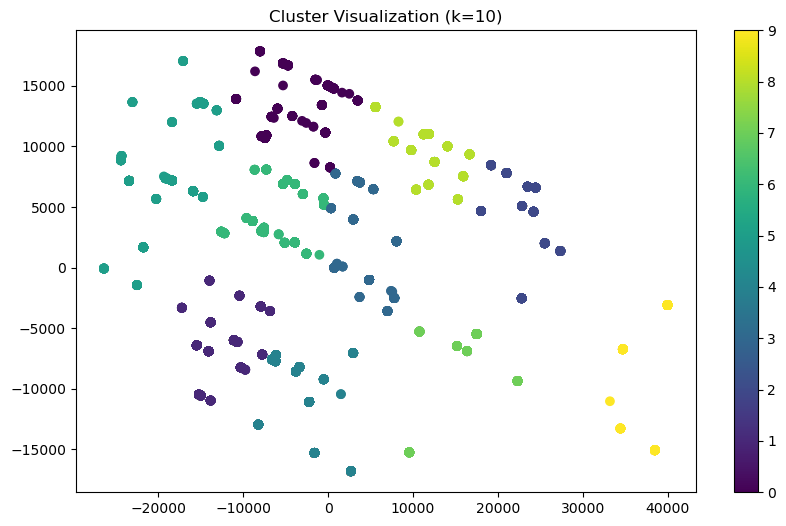


Visualizing clusters for k=4


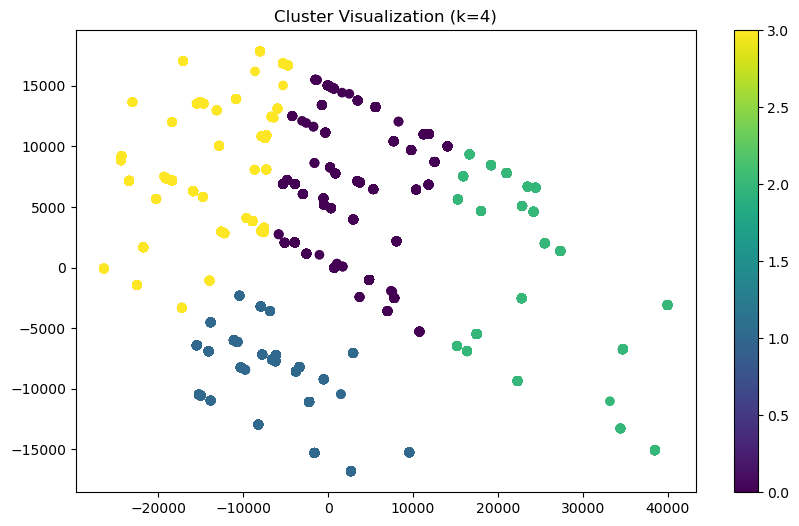

In [72]:
# Visualize clusters for best k
def visualize_clusters(X, k):
    """
    Visualize clusters using PCA for dimensionality reduction
    """
    
    # Reduce dimensionality to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Cluster Visualization (k={k})')
    plt.colorbar(scatter)
    plt.show()
    
    return kmeans, labels

# Visualize clusters for each suggested k
for k in suggested_k_values:
    print(f"\nVisualizing clusters for k={k}")
    model, labels = visualize_clusters(X_train, k)

In [73]:
# Create final model with chosen k
# You can choose the k value based on the analysis above
chosen_k = results['optimal_k_calinski']  # or whichever method you prefer
final_model, final_metrics = evaluate_kmeans(X_train, chosen_k)

print("\nFinal model metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.3f}")


Final model metrics:
inertia: 142569566706.709
silhouette: 0.524
calinski_harabasz: 13088.911


In [74]:
# Apply to test set
test_labels = final_model.predict(X_test)